[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Van_Hook_1968/fig_1.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Van_Hook_1968/fig_1.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Van_Hook_1968/fig_1.ipynb)

### based on Fig. 1 from Van Hook 1968 (J. Phys. Chem.) "_Van Hook, W. A. (1968). Vapor pressures of the isotopic waters and ices_" (https://doi.org/10.1021/j100850a028)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [ ]:
from open_atmos_jupyter_utils import show_plot
from matplotlib import pyplot
from PySDM import Formulae
from PySDM.physics import si
import numpy as np

In [3]:
formulae = Formulae(isotope_equilibrium_fractionation_factors="VanHook1968")
alphas = formulae.isotope_equilibrium_fractionation_factors

In [4]:
N_POINTS = 64

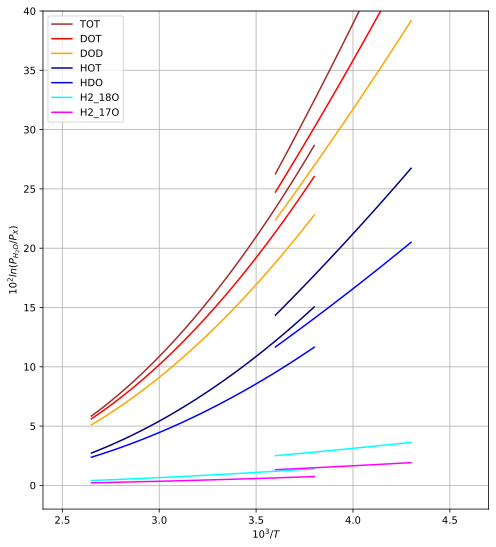

HTML(value="<a href='./fig_1.pdf' target='_blank'>./fig_1.pdf</a><br>")

In [5]:
def trans_x(T):
    return 1e3 / T

def trans_y(alpha):
    return 1e2 * np.log(alpha)


pyplot.figure(figsize=(8,9))

for isotopologue, color in {
    "TOT": "brown",
    "DOT": "red",
    "DOD": "orange",
    "HOT": "navy",
    "HDO": "blue",
    "H2_18O": "cyan",
    "H2_17O": "magenta",    
}.items():
    line_1_T = np.linspace(1000/2.65 * si.K, 1000/3.8 * si.K, N_POINTS)
    pyplot.plot(
        trans_x(line_1_T),
        trans_y(getattr(alphas, f"alpha_l_{isotopologue}")(line_1_T)),
        label=isotopologue,
        color=color
    )

    line_2_T = np.linspace(1000/3.6 * si.K, 1000/4.3 * si.K, N_POINTS)
    pyplot.plot(
        trans_x(line_2_T),
        trans_y(getattr(alphas, f"alpha_i_{isotopologue}")(line_2_T)),
        color=color
    )

pyplot.legend()
pyplot.grid()
pyplot.xlabel("$10^3/T$")
pyplot.ylabel("$10^2 ln(P_{H_2O}/P_X)$")
pyplot.xlim(2.4, 4.7)
pyplot.ylim(-2, 40)

show_plot("fig_1.pdf")